# The third part of project are analyse this indicators:
- GDP per capita (current US$)
- Gross capital formation (constant LCU)
- Inflation, consumer prices (annual %)

# 1. Data Collection (Read the Data)  

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

Read all the three datasets

In [3]:
df1 = pd.read_csv("GDP per capita (current US$).csv",
                  parse_dates=True,
                  index_col="Year")
df1

,GDP per capita (current US$)
Year,
1960-01-01,196.323927
1961-01-01,201.374873
1962-01-01,654626.000000
1963-01-01,211.901118
1964-01-01,224.641117
...,...
2018-01-01,3829.829855
2019-01-01,3276.753265
2020-01-01,2746.419483


In [4]:
df2 = pd.read_csv("Gross capital formation (constant LCU).csv",
                  parse_dates=True,
                  index_col="Year")
df2

,Gross capital formation (constant LCU)
Year,
1960-01-01,4.858870e+14
1961-01-01,5.178932e+14
1962-01-01,5.160805e+14
1963-01-01,5.504361e+14
1964-01-01,6.525514e+14
...,...
2018-01-01,4.197904e+15
2019-01-01,NaN
2020-01-01,NaN


In [5]:
df3 = pd.read_csv("Inflation, consumer prices (annual %).csv",
                  parse_dates=True,
                  index_col="Year")
df3

,"Inflation, consumer prices (annual %)"
Year,
1960-01-01,9.822411
1961-01-01,3.162564
1962-01-01,0.721321
1963-01-01,0.371850
1964-01-01,3.814490
...,...
2018-01-01,18.014118
2019-01-01,39.907346
2020-01-01,30.594139


# 2.Data Preprocessing and Visualization

## 2.1 Feature Eng.

GDP per capita (current US$)

In [9]:
df1['lag1'] = df1['GDP per capita (current US$)'].shift(1)
df1['lag2'] = df1['GDP per capita (current US$)'].shift(2)
df1['lag3'] = df1['GDP per capita (current US$)'].shift(3)

df1['MA3'] = df1['GDP per capita (current US$)'].rolling(
    window=3).mean()
df1['MA4'] = df1['GDP per capita (current US$)'].rolling(
    window=4).mean()
df1['MA5'] = df1['GDP per capita (current US$)'].rolling(
    window=5).mean()
df1['MAX5'] = df1['GDP per capita (current US$)'].rolling(
    window=5).max()
df1['MIN5'] = df1['GDP per capita (current US$)'].rolling(
    window=5).min()


df1.head()

,GDP per capita (current US$),lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1960-01-01,196.323927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,201.374873,196.323927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,654626.000000,201.374873,196.323927,NaN,218341.232933,NaN,NaN,NaN,NaN
1963-01-01,211.901118,654626.000000,201.374873,196.323927,218346.425330,163808.899979,NaN,NaN,NaN
1964-01-01,224.641117,211.901118,654626.000000,201.374873,218354.180745,163815.979277,131092.048207,654626.0,196.323927


In [10]:
df1 = df1.dropna()
df1.head()

,GDP per capita (current US$),lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1964-01-01,224.641117,211.901118,654626.000000,201.374873,218354.180745,163815.979277,131092.048207,654626.000000,196.323927
1965-01-01,251.239040,224.641117,211.901118,654626.000000,229.260425,163828.445319,131103.031229,654626.000000,201.374873
1966-01-01,267.334102,251.239040,224.641117,211.901118,247.738086,238.778844,131116.223075,654626.000000,211.901118
1967-01-01,289.108985,267.334102,251.239040,224.641117,269.227376,258.080811,248.844872,289.108985,211.901118
1968-01-01,320.858644,289.108985,267.334102,251.239040,292.433910,282.135193,270.636377,320.858644,224.641117


Gross capital formation (constant LCU)

In [11]:
df2['lag1'] = df2['Gross capital formation (constant LCU)'].shift(1)
df2['lag2'] = df2['Gross capital formation (constant LCU)'].shift(2)
df2['lag3'] = df2['Gross capital formation (constant LCU)'].shift(3)

df2['MA3'] = df2['Gross capital formation (constant LCU)'].rolling(
    window=3).mean()
df2['MA4'] = df2['Gross capital formation (constant LCU)'].rolling(
    window=4).mean()
df2['MA5'] = df2['Gross capital formation (constant LCU)'].rolling(
    window=5).mean()
df2['MAX5'] = df2['Gross capital formation (constant LCU)'].rolling(
    window=5).max()
df2['MIN5'] = df2['Gross capital formation (constant LCU)'].rolling(
    window=5).min()


df2.head()

,Gross capital formation (constant LCU),lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1960-01-01,4.858870e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,5.178932e+14,4.858870e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,5.160805e+14,5.178932e+14,4.858870e+14,NaN,5.066202e+14,NaN,NaN,NaN,NaN
1963-01-01,5.504361e+14,5.160805e+14,5.178932e+14,4.858870e+14,5.281366e+14,5.175742e+14,NaN,NaN,NaN
1964-01-01,6.525514e+14,5.504361e+14,5.160805e+14,5.178932e+14,5.730227e+14,5.592403e+14,5.445696e+14,6.525514e+14,4.858870e+14


In [12]:
df2 = df2.dropna()
df2.head()

,Gross capital formation (constant LCU),lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1964-01-01,6.525514e+14,5.504361e+14,5.160805e+14,5.178932e+14,5.730227e+14,5.592403e+14,5.445696e+14,6.525514e+14,4.858870e+14
1965-01-01,8.076512e+14,6.525514e+14,5.504361e+14,5.160805e+14,6.702129e+14,6.316798e+14,6.089225e+14,8.076512e+14,5.160805e+14
1966-01-01,8.993305e+14,8.076512e+14,6.525514e+14,5.504361e+14,7.865111e+14,7.274923e+14,6.852100e+14,8.993305e+14,5.160805e+14
1967-01-01,1.024585e+15,8.993305e+14,8.076512e+14,6.525514e+14,9.105221e+14,8.460295e+14,7.869108e+14,1.024585e+15,5.504361e+14
1968-01-01,1.266276e+15,1.024585e+15,8.993305e+14,8.076512e+14,1.063397e+15,9.994605e+14,9.300787e+14,1.266276e+15,6.525514e+14


Inflation, consumer prices (annual %)

In [13]:
df3['lag1'] = df3['Inflation, consumer prices (annual %)'].shift(1)
df3['lag2'] = df3['Inflation, consumer prices (annual %)'].shift(2)
df3['lag3'] = df3['Inflation, consumer prices (annual %)'].shift(3)

df3['MA3'] = df3['Inflation, consumer prices (annual %)'].rolling(
    window=3).mean()
df3['MA4'] = df3['Inflation, consumer prices (annual %)'].rolling(
    window=4).mean()
df3['MA5'] = df3['Inflation, consumer prices (annual %)'].rolling(
    window=5).mean()
df3['MAX5'] = df3['Inflation, consumer prices (annual %)'].rolling(
    window=5).max()
df3['MIN5'] = df3['Inflation, consumer prices (annual %)'].rolling(
    window=5).min()


df3.head()

,"Inflation, consumer prices (annual %)",lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1960-01-01,9.822411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,3.162564,9.822411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,0.721321,3.162564,9.822411,NaN,4.568765,NaN,NaN,NaN,NaN
1963-01-01,0.371850,0.721321,3.162564,9.822411,1.418578,3.519536,NaN,NaN,NaN
1964-01-01,3.814490,0.371850,0.721321,3.162564,1.635887,2.017556,3.578527,9.822411,0.37185


In [14]:
df3 = df3.dropna()
df3.head()

,"Inflation, consumer prices (annual %)",lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
Year,,,,,,,,,
1964-01-01,3.814490,0.371850,0.721321,3.162564,1.635887,2.017556,3.578527,9.822411,0.371850
1965-01-01,2.154375,3.814490,0.371850,0.721321,2.113571,1.765509,2.044920,3.814490,0.371850
1966-01-01,-0.388149,2.154375,3.814490,0.371850,1.860239,1.488141,1.334777,3.814490,-0.388149
1967-01-01,1.597610,-0.388149,2.154375,3.814490,1.121279,1.794581,1.510035,3.814490,-0.388149
1968-01-01,0.690361,1.597610,-0.388149,2.154375,0.633274,1.013549,1.573737,3.814490,-0.388149


## 2.2 Normalization

Because of the different scales in datasets, I use Normalization.

# 3.Data Visualization

GDP per capita (current US$)

In [15]:
df1_arr = df1.values
df1_arr

array([[2.24641117e+02, 2.11901118e+02, 6.54626000e+05, 2.01374873e+02,
        2.18354181e+05, 1.63815979e+05, 1.31092048e+05, 6.54626000e+05,
        1.96323927e+02],
       [2.51239040e+02, 2.24641117e+02, 2.11901118e+02, 6.54626000e+05,
        2.29260425e+02, 1.63828445e+05, 1.31103031e+05, 6.54626000e+05,
        2.01374873e+02],
       [2.67334102e+02, 2.51239040e+02, 2.24641117e+02, 2.11901118e+02,
        2.47738086e+02, 2.38778844e+02, 1.31116223e+05, 6.54626000e+05,
        2.11901118e+02],
       [2.89108985e+02, 2.67334102e+02, 2.51239040e+02, 2.24641117e+02,
        2.69227376e+02, 2.58080811e+02, 2.48844872e+02, 2.89108985e+02,
        2.11901118e+02],
       [3.20858644e+02, 2.89108985e+02, 2.67334102e+02, 2.51239040e+02,
        2.92433910e+02, 2.82135193e+02, 2.70636377e+02, 3.20858644e+02,
        2.24641117e+02],
       [3.52452634e+02, 3.20858644e+02, 2.89108985e+02, 2.67334102e+02,
        3.20806754e+02, 3.07438591e+02, 2.96198681e+02, 3.52452634e+02,
        2.5

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df1_arr)
print(scaler.data_max_)
print(scaler.data_min_)

[  8329.00206688   8329.00206688 654626.         654626.
 218354.18074482 163828.44531853 131116.22307529 654626.
   5757.54333262]
[224.64111685 211.90111762 211.90111762 201.37487309 229.2604247
 238.77884411 248.84487222 289.10898467 196.3239269 ]


In [18]:
df_normalize = scaler.transform(df1_arr)

for i in range(5):
    print(df_normalize[i])

[0.         0.         1.         0.         1.         0.9999238
 0.99981527 1.         0.        ]
[3.28192722e-03 1.56952578e-03 0.00000000e+00 1.00000000e+00
 0.00000000e+00 1.00000000e+00 9.99899197e-01 1.00000000e+00
 9.08244366e-04]
[5.26790277e-03 4.84630193e-03 1.94677945e-05 1.60847317e-05
 8.47113734e-05 0.00000000e+00 1.00000000e+00 1.00000000e+00
 2.80103869e-03]
[7.95471330e-03 6.82916044e-03 6.01116664e-05 3.55522131e-05
 1.83229641e-04 1.17990135e-04 0.00000000e+00 0.00000000e+00
 2.80103869e-03]
[1.18723151e-02 9.51175395e-03 8.47062812e-05 7.61954313e-05
 2.89620670e-04 2.65031095e-04 1.66515946e-04 4.85218846e-05
 5.09190303e-03]


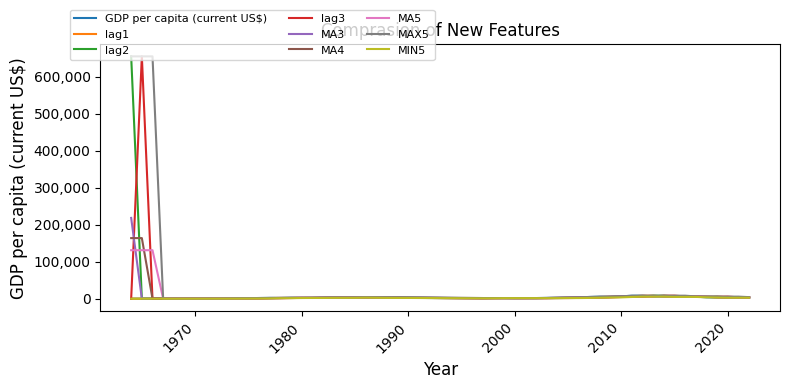

In [20]:
df1.plot(style='-', figsize=(8, 4),
         title='Comprasion of New Features')

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per capita (current US$)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

Gross capital formation (constant LCU)

In [21]:
df2_arr = df2.values
df2_arr

array([[6.52551439e+14, 5.50436129e+14, 5.16080474e+14, 5.17893163e+14,
        5.73022681e+14, 5.59240301e+14, 5.44569645e+14, 6.52551439e+14,
        4.85887019e+14],
       [8.07651248e+14, 6.52551439e+14, 5.50436129e+14, 5.16080474e+14,
        6.70212939e+14, 6.31679822e+14, 6.08922491e+14, 8.07651248e+14,
        5.16080474e+14],
       [8.99330509e+14, 8.07651248e+14, 6.52551439e+14, 5.50436129e+14,
        7.86511065e+14, 7.27492331e+14, 6.85209960e+14, 8.99330509e+14,
        5.16080474e+14],
       [1.02458461e+15, 8.99330509e+14, 8.07651248e+14, 6.52551439e+14,
        9.10522123e+14, 8.46029452e+14, 7.86910787e+14, 1.02458461e+15,
        5.50436129e+14],
       [1.26627566e+15, 1.02458461e+15, 8.99330509e+14, 8.07651248e+14,
        1.06339693e+15, 9.99460506e+14, 9.30078693e+14, 1.26627566e+15,
        6.52551439e+14],
       [1.37401887e+15, 1.26627566e+15, 1.02458461e+15, 8.99330509e+14,
        1.22162638e+15, 1.14105241e+15, 1.07437218e+15, 1.37401887e+15,
        8.0

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df2_arr)
print(scaler.data_max_)
print(scaler.data_min_)

[6.15263973e+15 6.15263973e+15 6.15263973e+15 6.15263973e+15
 5.88246901e+15 5.77893999e+15 5.71053119e+15 6.15263973e+15
 5.43689600e+15]
[6.52551439e+14 5.50436129e+14 5.16080474e+14 5.16080474e+14
 5.73022681e+14 5.59240301e+14 5.44569645e+14 6.52551439e+14
 4.85887019e+14]


In [23]:
df_normalize = scaler.transform(df2_arr)

for i in range(5):
    print(df_normalize[i])

[0.         0.         0.         0.00032159 0.         0.
 0.         0.         0.        ]
[0.02819951 0.0182277  0.00609515 0.         0.01830516 0.0138781
 0.01245709 0.02819951 0.00609844]
[0.0448682  0.0459132  0.02421175 0.00609515 0.04020916 0.03223404
 0.02722442 0.0448682  0.00609844]
[0.06764131 0.06227806 0.0517285  0.02421175 0.06356584 0.05494361
 0.04691114 0.06764131 0.01303757]
[0.11158443 0.08463607 0.06799361 0.0517285  0.09235883 0.08433822
 0.07462484 0.11158443 0.03366272]


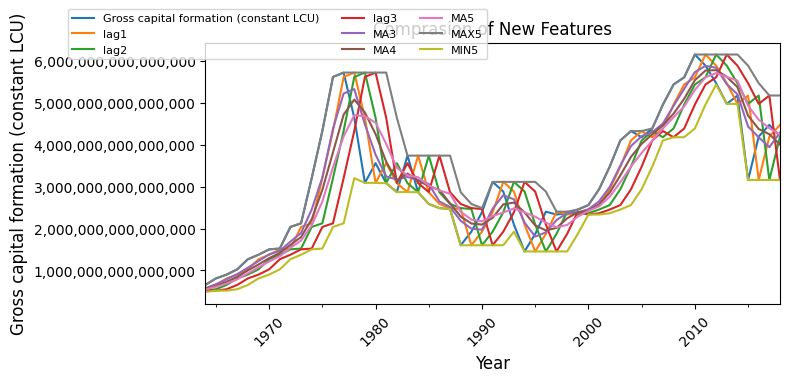

In [28]:
df2.plot(style='-', figsize=(8, 4),
         title='Comprasion of New Features')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Gross capital formation (constant LCU)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

Inflation, consumer prices (annual %)

In [25]:
df3_arr = df3.values
df3_arr

array([[ 3.81448957,  0.37184961,  0.72132057,  3.1625644 ,  1.63588658,
         2.01755604,  3.57852699,  9.82241081,  0.37184961],
       [ 2.15437484,  3.81448957,  0.37184961,  0.72132057,  2.11357134,
         1.76550865,  2.0449198 ,  3.81448957,  0.37184961],
       [-0.38814853,  2.15437484,  3.81448957,  0.37184961,  1.86023863,
         1.48814137,  1.33477721,  3.81448957, -0.38814853],
       [ 1.59761008, -0.38814853,  2.15437484,  3.81448957,  1.12127879,
         1.79458149,  1.51003511,  3.81448957, -0.38814853],
       [ 0.69036052,  1.59761008, -0.38814853,  2.15437484,  0.63327402,
         1.01354923,  1.5737373 ,  3.81448957, -0.38814853],
       [ 3.59319452,  0.69036052,  1.59761008, -0.38814853,  1.96038837,
         1.37325415,  1.52947828,  3.59319452, -0.38814853],
       [ 1.66687094,  3.59319452,  0.69036052,  1.59761008,  1.98347533,
         1.88700901,  1.4319775 ,  3.59319452, -0.38814853],
       [ 4.19529837,  1.66687094,  3.59319452,  0.69036052,  3

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(df3_arr)
print(scaler.data_max_)
print(scaler.data_min_)

[49.65598585 49.65598585 49.65598585 49.65598585 37.96350029 32.9761548
 31.41014233 49.65598585 21.20263075]
[-0.38814853 -0.38814853 -0.38814853 -0.38814853  0.63327402  1.01354923
  1.33477721  3.59319452 -0.38814853]


In [27]:
df_normalize = scaler.transform(df3_arr)

for i in range(5):
    print(df_normalize[i])

[0.08397864 0.01518656 0.02216981 0.07095163 0.02685793 0.03141192
 0.07460424 0.13523315 0.03520013]
[0.05080562 0.08397864 0.01518656 0.02216981 0.03965412 0.02352622
 0.0236121  0.0048042  0.03520013]
[0.         0.05080562 0.08397864 0.01518656 0.03286786 0.01484836
 0.         0.0048042  0.        ]
[0.03968015 0.         0.05080562 0.08397864 0.01307264 0.02443581
 0.00582729 0.0048042  0.        ]
[0.02155116 0.03968015 0.         0.05080562 0.         0.
 0.00794538 0.0048042  0.        ]


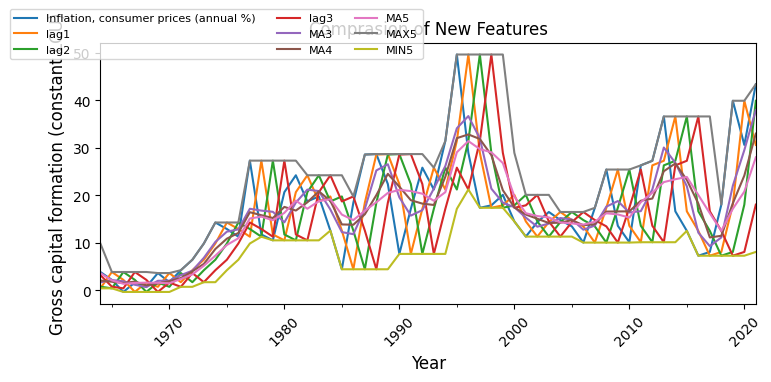

In [29]:
df3.plot(style='-', figsize=(8, 4),
         title='Comprasion of New Features')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Gross capital formation (constant LCU)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=8)
plt.tight_layout()
plt.show()

In [53]:
df1 = df1.rename(columns={df1.columns[0]: 'Actual'})

df1_error1 = mean_squared_error(df1.Actual, df1.lag1)
df1_error2 = mean_squared_error(df1.Actual, df1.lag2)
df1_error3 = mean_squared_error(df1.Actual, df1.lag3)
df1_error4 = mean_squared_error(df1.Actual, df1.MA3)
df1_error5 = mean_squared_error(df1.Actual, df1.MA4)
df1_error6 = mean_squared_error(df1.Actual, df1.MA5)
df1_error7 = mean_squared_error(df1.Actual, df1.MAX5)
df1_error8 = mean_squared_error(df1.Actual, df1.MIN5)

df1_errors = {
    "Model": ["Lag 1", "Lag 2", "Lag 3", "MA 3", "MA 4", "MA 5", "MAX 5", "MIN 5"],
    "Mean Squared Error": [
        df1_error1,
        df1_error2,
        df1_error3,
        df1_error4,
        df1_error5,
        df1_error6,
        df1_error7,
        df1_error8
    ],
}

error_df1 = pd.DataFrame(df1_errors)
sorted_error_df1 = error_df1.sort_values(by='Mean Squared Error')
sorted_error_df1.reset_index(drop=True, inplace=True)
print(sorted_error_df1)

   Model  Mean Squared Error
0  Lag 1        4.254170e+05
1  MIN 5        1.417817e+06
2   MA 3        8.980301e+08
3   MA 5        9.698947e+08
4   MA 4        1.010274e+09
5  Lag 3        8.080993e+09
6  Lag 2        8.081091e+09
7  MAX 5        2.423961e+10


In [32]:
df2 = df2.rename(columns={df2.columns[0]: 'Actual'})

df2_error1 = mean_squared_error(df2.Actual, df2.lag1)
df2_error2 = mean_squared_error(df2.Actual, df2.lag2)
df2_error3 = mean_squared_error(df2.Actual, df2.lag3)
df2_error4 = mean_squared_error(df2.Actual, df2.MA3)
df2_error5 = mean_squared_error(df2.Actual, df2.MA4)
df2_error6 = mean_squared_error(df2.Actual, df2.MA5)
df2_error7 = mean_squared_error(df2.Actual, df2.MAX5)
df2_error8 = mean_squared_error(df2.Actual, df2.MIN5)

df2_errors = {
    "Model": ["Lag 1", "Lag 2", "Lag 3", "MA 3", "MA 4", "MA 5", "MAX 5", "MIN 5"],
    "Mean Squared Error": [
        df2_error1,
        df2_error2,
        df2_error3,
        df2_error4,
        df2_error5,
        df2_error6,
        df2_error7,
        df2_error8
    ],
}

error_df2 = pd.DataFrame(df2_errors)
sorted_error_df2 = error_df2.sort_values(by='Mean Squared Error')
sorted_error_df2.reset_index(drop=True, inplace=True)
print(sorted_error_df2)

   Model  Mean Squared Error
0   MA 3        2.346587e+29
1  Lag 1        3.819444e+29
2   MA 4        3.858881e+29
3   MA 5        5.345476e+29
4  Lag 2        8.643118e+29
5  MAX 5        8.959100e+29
6  MIN 5        1.315859e+30
7  Lag 3        1.353175e+30


In [33]:
df3 = df3.rename(columns={df3.columns[0]: 'Actual'})

df3_error1 = mean_squared_error(df3.Actual, df3.lag1)
df3_error2 = mean_squared_error(df3.Actual, df3.lag2)
df3_error3 = mean_squared_error(df3.Actual, df3.lag3)
df3_error4 = mean_squared_error(df3.Actual, df3.MA3)
df3_error5 = mean_squared_error(df3.Actual, df3.MA4)
df3_error6 = mean_squared_error(df3.Actual, df3.MA5)
df3_error7 = mean_squared_error(df3.Actual, df3.MAX5)
df3_error8 = mean_squared_error(df3.Actual, df3.MIN5)

df3_errors = {
    "Model": ["Lag 1", "Lag 2", "Lag 3", "MA 3", "MA 4", "MA 5", "MAX 5", "MIN 5"],
    "Mean Squared Error": [
        df3_error1,
        df3_error2,
        df3_error3,
        df3_error4,
        df3_error5,
        df3_error6,
        df3_error7,
        df3_error8
    ],
}

error_df3 = pd.DataFrame(df3_errors)
sorted_error_df3 = error_df3.sort_values(by='Mean Squared Error')
sorted_error_df3.reset_index(drop=True, inplace=True)
print(sorted_error_df3)

   Model  Mean Squared Error
0   MA 3           40.269289
1   MA 4           53.754974
2   MA 5           63.027346
3  Lag 1           78.764181
4  Lag 2          140.419481
5  MAX 5          150.966890
6  Lag 3          164.456037
7  MIN 5          168.745603


## 3.1 Adfuller test for Stationary

In [34]:
# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(Actual):
    result = adfuller(Actual)
    labels = ['ADF Test Statistic', 'p-value',
              '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("stationary")
    else:
        print("non-stationary ")

In [35]:
print(adfuller_test(df1['Actual']))

ADF Test Statistic : -1.7716325330144251
p-value : 0.39463349352987076
#Lags Used : 1
Number of Observations Used : 51
non-stationary 
None


In [36]:
print(adfuller_test(df2['Actual']))

ADF Test Statistic : -0.11708096648001641
p-value : 0.9477104020901155
#Lags Used : 0
Number of Observations Used : 54
non-stationary 
None


In [37]:
print(adfuller_test(df3['Actual']))

ADF Test Statistic : -3.099655798276974
p-value : 0.02657867144045415
#Lags Used : 1
Number of Observations Used : 56
stationary
None


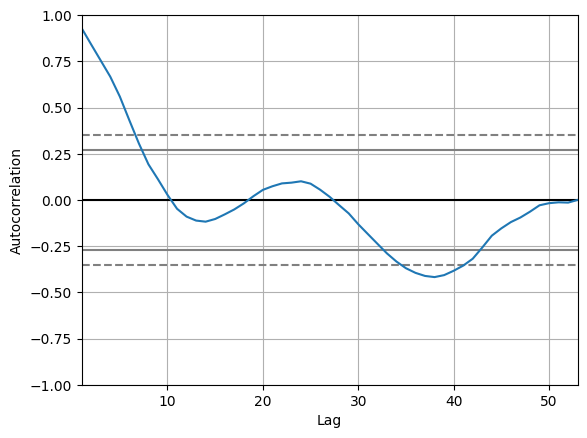

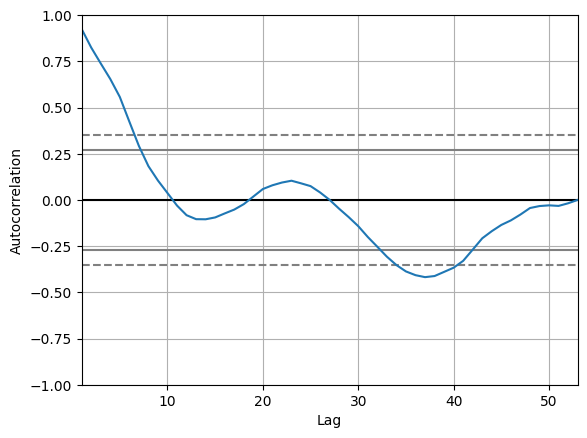

In [41]:
autocorrelation_plot(df1['lag1'])
plt.show()
autocorrelation_plot(df1['Actual'])
plt.show()

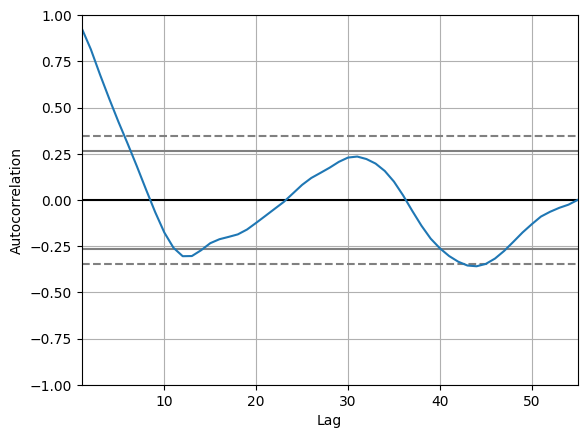

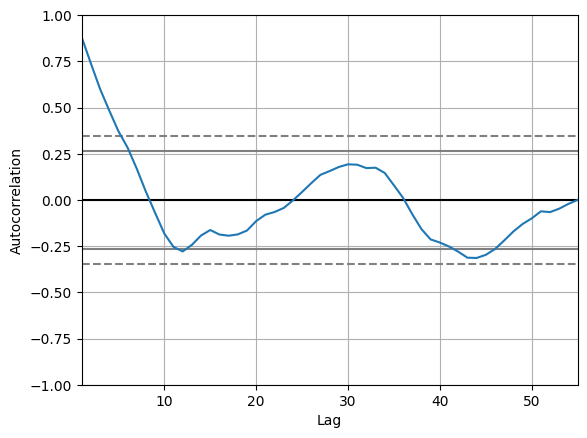

In [42]:
autocorrelation_plot(df2['MA3'])
plt.show()
autocorrelation_plot(df2['Actual'])
plt.show()

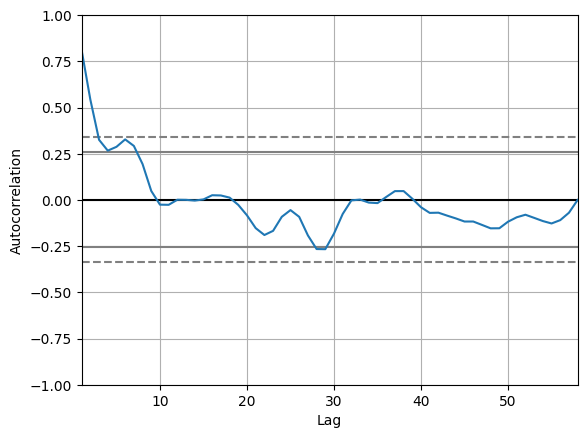

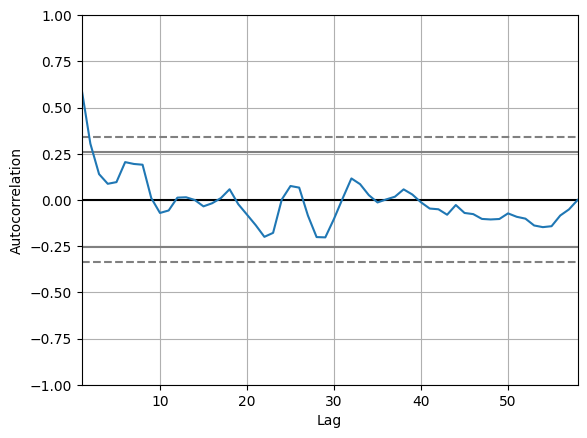

In [43]:
autocorrelation_plot(df3['MA3'])
plt.show()
autocorrelation_plot(df3['Actual'])
plt.show()

## 3.2 Statistical Analysis (ACF & PACF)

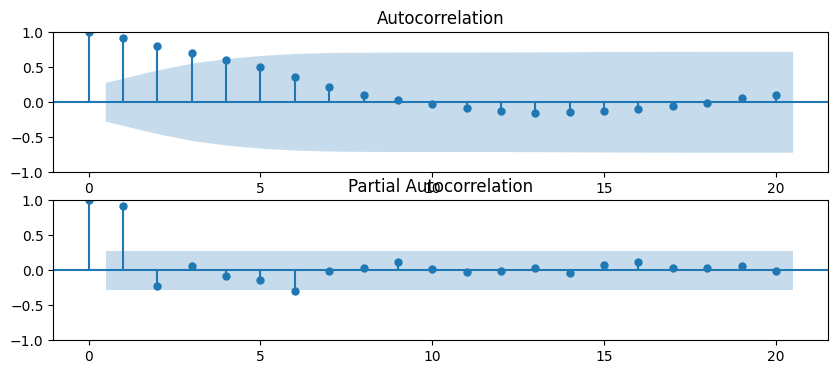

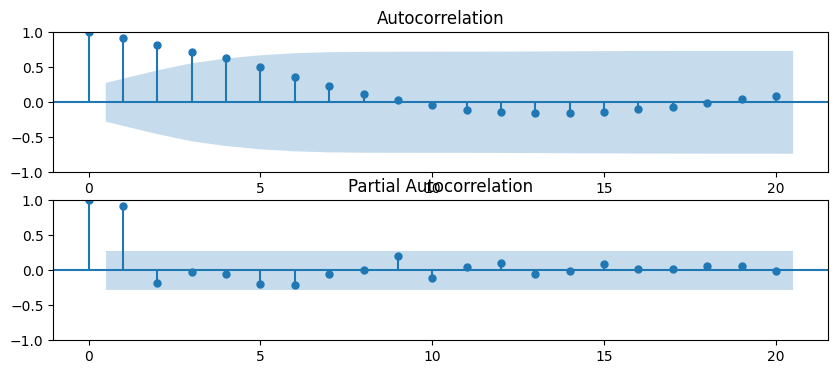

In [47]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df1['Actual'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df1['Actual'].iloc[3:], lags=20, ax=ax2)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df1['lag1'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df1['lag1'].iloc[3:], lags=20, ax=ax2)

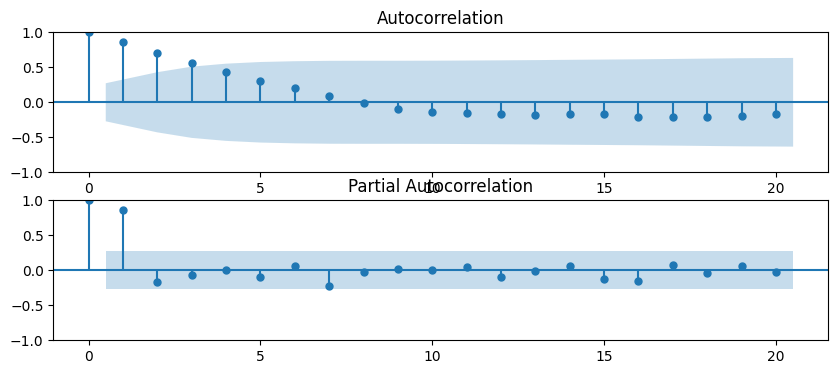

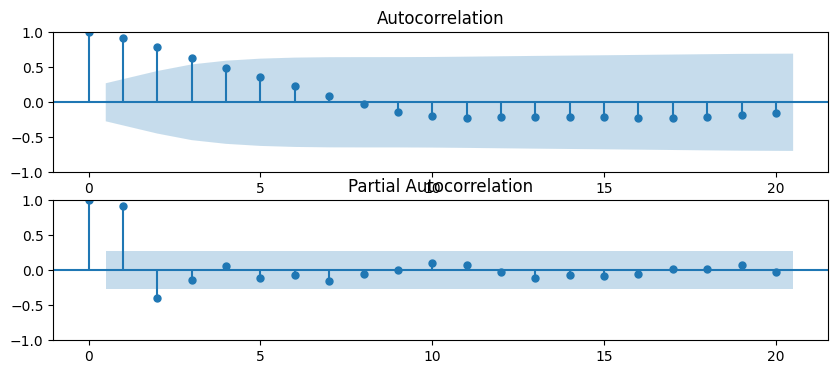

In [48]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df2['Actual'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df2['Actual'].iloc[3:], lags=20, ax=ax2)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df2['MA3'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df2['MA3'].iloc[3:], lags=20, ax=ax2)

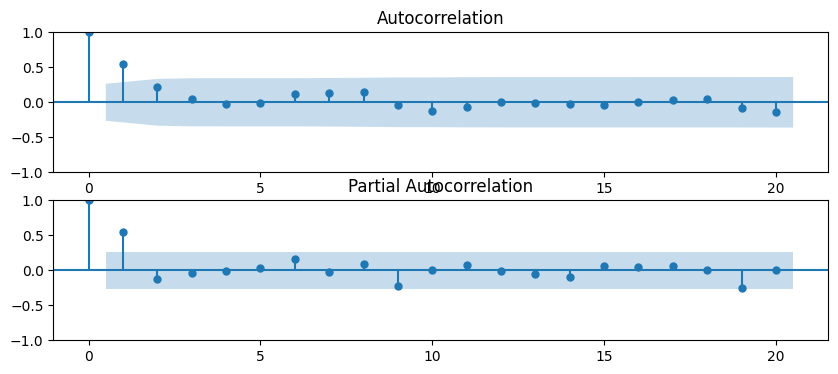

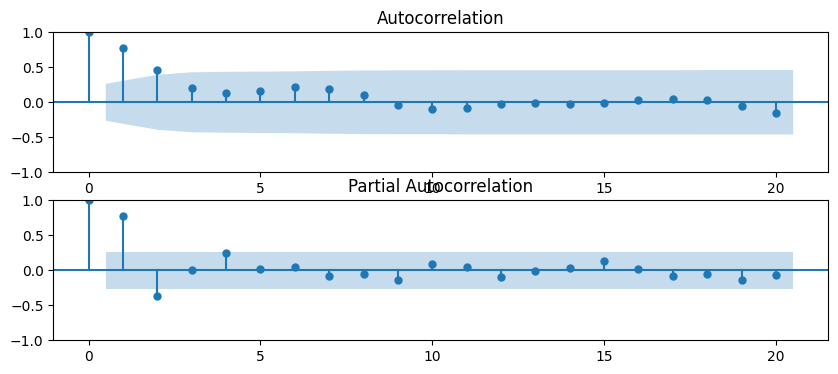

In [49]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df3['Actual'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df3['Actual'].iloc[3:], lags=20, ax=ax2)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    df3['MA3'].iloc[3:], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(
    df3['MA3'].iloc[3:], lags=20, ax=ax2)

# 4. Analysis the Actual data and the lowest MSE in feature creation (All the datasets)

GDP per capita (current US$)

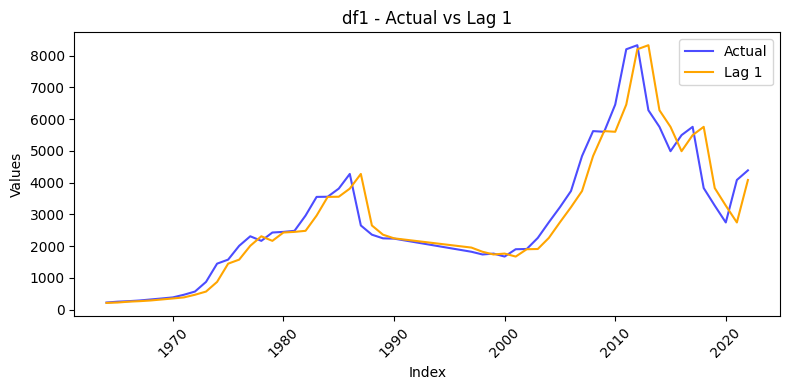

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(df1.index, df1['Actual'], label='Actual', color='blue', alpha=0.7)
plt.plot(df1.index, df1['lag1'], label='Lag 1', color='orange')
plt.title('df1 - Actual vs Lag 1')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Gross capital formation (constant LCU)

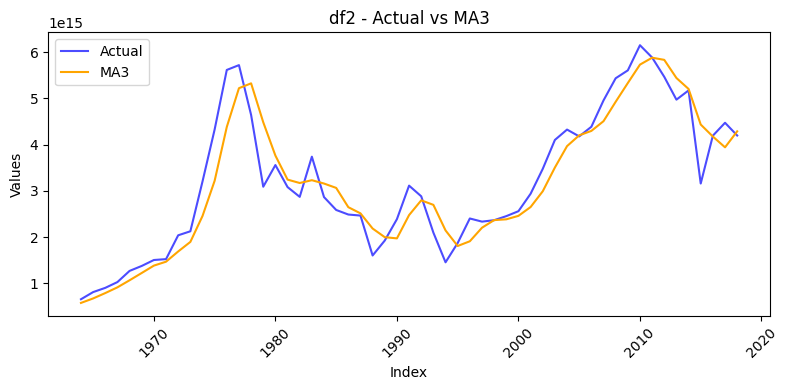

In [59]:
plt.figure(figsize=(8, 4))
plt.plot(df2.index, df2['Actual'], label='Actual', color='blue', alpha=0.7)
plt.plot(df2.index, df2['MA3'], label='MA3', color='orange')
plt.title('df2 - Actual vs MA3')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Inflation, consumer prices (annual %)

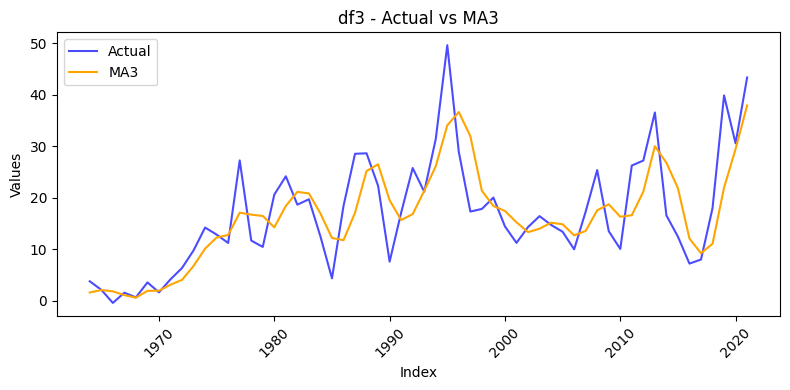

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(df3.index, df3['Actual'], label='Actual', color='blue', alpha=0.7)
plt.plot(df3.index, df3['MA3'], label='MA3', color='orange')
plt.title('df3 - Actual vs MA3')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The End.